## Time Series Concepts 
### Generating processes from random 

Partly From

https://machinelearningmastery.com/gentle-introduction-random-walk-times-series-forecasting-python

In [1]:
from random import seed
from random import random
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot
import numpy as np 
import pylab 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm


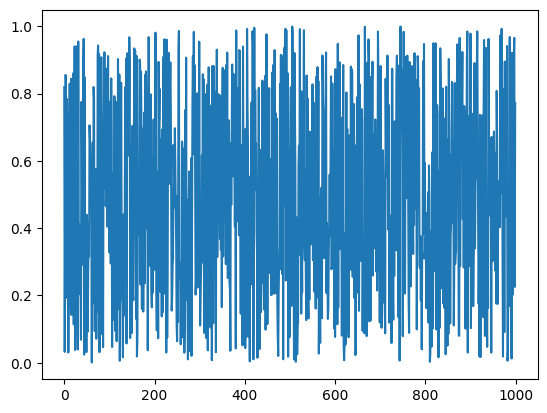

In [2]:
#seed(1)
series = [random() for i in range(1000)]
pyplot.plot(series)
pyplot.show()

## What is this?
This is 1000 random numbers between 0 and 1
Let's think about them as probabilities:
- of a step forward or a step back
- of success or failure at each time step
- of stock moving up or down

In [3]:
#seed(17) # Remember to remove or change this!
random_walk = list()
random_walk.append(-1 if random() < 0.5 else 1)
for i in range(1, 1000):
    movement = -1 if random() < 0.5 else 1
    value = random_walk[i-1] + movement
    random_walk.append(value)

 
 

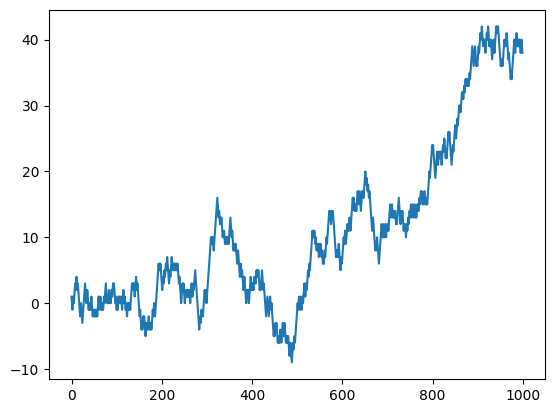

In [4]:
pyplot.plot(random_walk)
pyplot.show()

- If the probability is less than 0.5 then the stock goes down
- If the probability is more than 0.5 then the stock goes up

## Lets try a 2D Random Walk

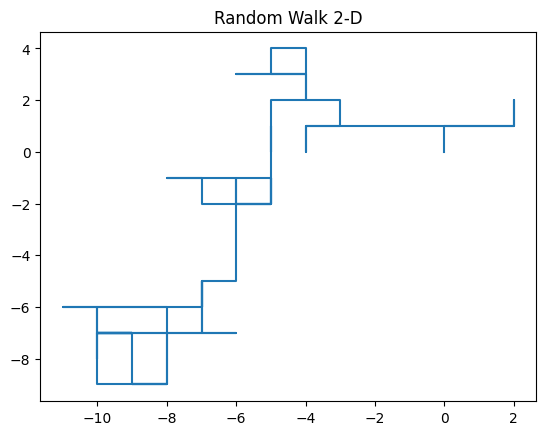

In [5]:

import random 
n = 100 #n is the number of steps(increase in the value of n increses the compelxity of graph) 
x = np.zeros(n) # x and y are arrays which store the coordinates of the position 
y = np.zeros(n) 
direction=["NORTH","SOUTH","EAST","WEST"] # Assuming the four directions of movement.
for i in range(1, n): 
    step = random.choice(direction) #Randomly choosing the direction of movement. 
    if step == "EAST": #updating the direction with respect to the direction of motion choosen.
        x[i] = x[i - 1] + 1
        y[i] = y[i - 1] 
    elif step == "WEST": 
        x[i] = x[i - 1] - 1
        y[i] = y[i - 1] 
    elif step == "NORTH": 
        x[i] = x[i - 1] 
        y[i] = y[i - 1] + 1
    else: 
        x[i] = x[i - 1] 
        y[i] = y[i - 1] - 1
pylab.title("Random Walk 2-D")
pylab.plot(x, y) #plotting the walk.
pylab.show()

Test Autocorrelation of the random walk

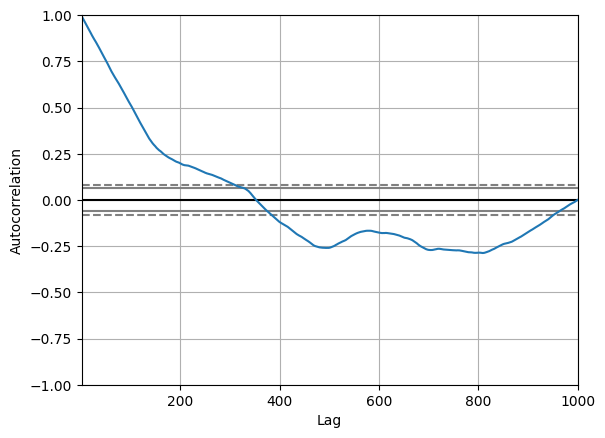

In [6]:
autocorrelation_plot(random_walk)
pyplot.show()

##  Part 2 - Moving on to ARMA models

Source:

https://goodboychan.github.io/python/datacamp/time_series_analysis/2020/06/08/01-Autoregressive-Models.html

Which is a solution from Datacamp problem sets

https://campus.datacamp.com/courses/time-series-analysis-in-python/autoregressive-ar-models?ex=2

But best to look at Statsmodels Documentation

https://www.statsmodels.org/dev/generated/statsmodels.tsa.arima_process.ArmaProcess.html#statsmodels.tsa.arima_process.ArmaProcess



In [7]:
plt.rcParams['figure.figsize'] = (10, 5)

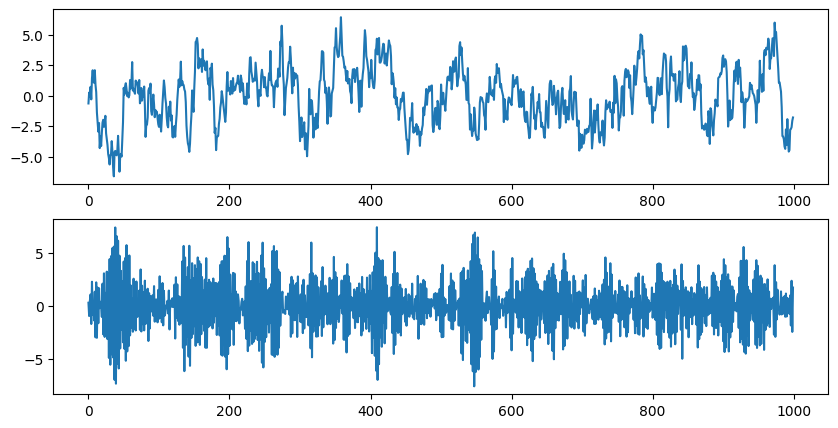

In [8]:
from statsmodels.tsa.arima_process import ArmaProcess

# Plot 1: AR parameter = +0.9
plt.subplot(2, 1, 1)
ar1 = np.array([1, -0.9])
ma1 = np.array([1])
AR_object1 = ArmaProcess(ar1, ma1)
simulated_data_AR1 = AR_object1.generate_sample(nsample=1000)
plt.plot(simulated_data_AR1);

# Plot 2: AR parameter = -0.9
plt.subplot(2, 1, 2)
ar2 = np.array([1, +0.9])
ma2 = np.array([1])
AR_object2 = ArmaProcess(ar2, ma2)
simulated_data_AR2 = AR_object2.generate_sample(nsample=1000)
plt.plot(simulated_data_AR2);

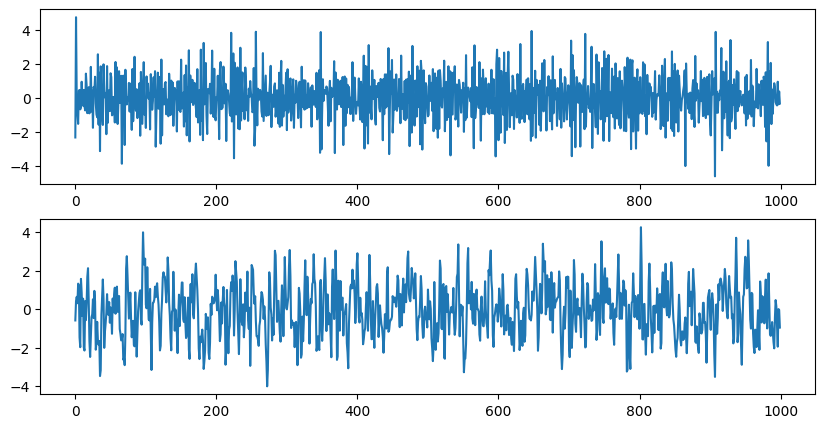

In [9]:
# Plot 1: MA parameter = +0.9
plt.subplot(2, 1, 1)
ar1 = np.array([1])
ma1 = np.array([1, -0.9])
AR_object1 = ArmaProcess(ar1, ma1)
simulated_data_MA1 = AR_object1.generate_sample(nsample=1000)
plt.plot(simulated_data_MA1);

# Plot 2: MA parameter = -0.9
plt.subplot(2, 1, 2)
ar2 = np.array([1])
ma2 = np.array([1, 0.9])
AR_object2 = ArmaProcess(ar2, ma2)
simulated_data_MA2 = AR_object2.generate_sample(nsample=1000)
plt.plot(simulated_data_MA2);

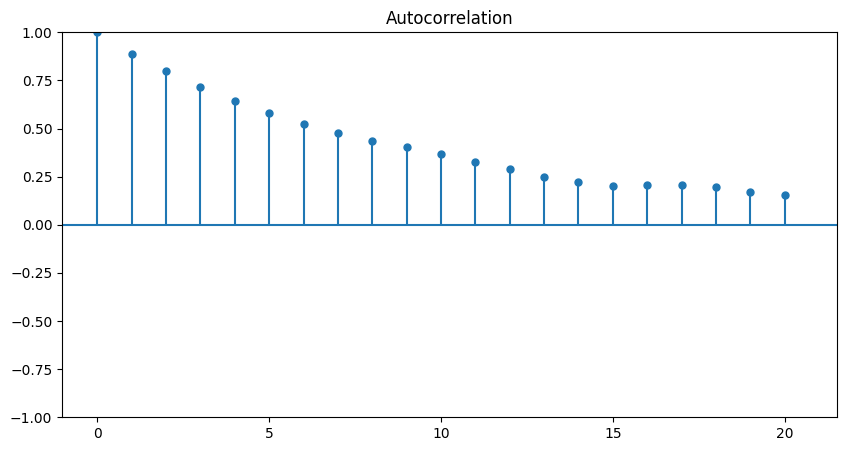

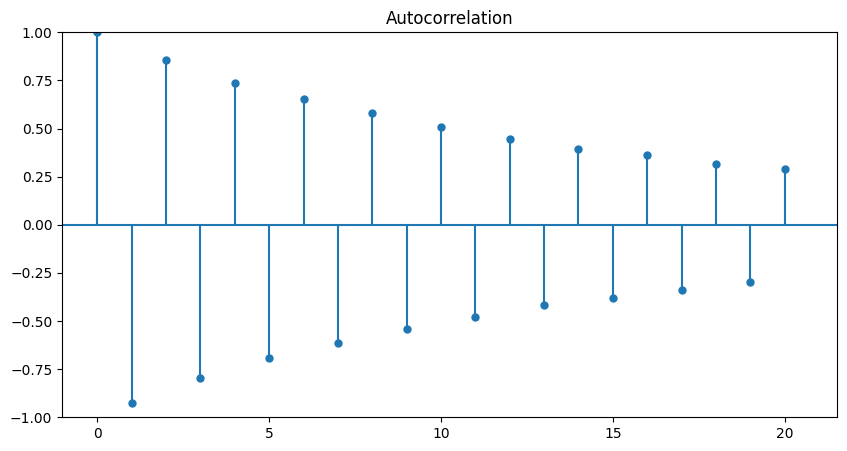

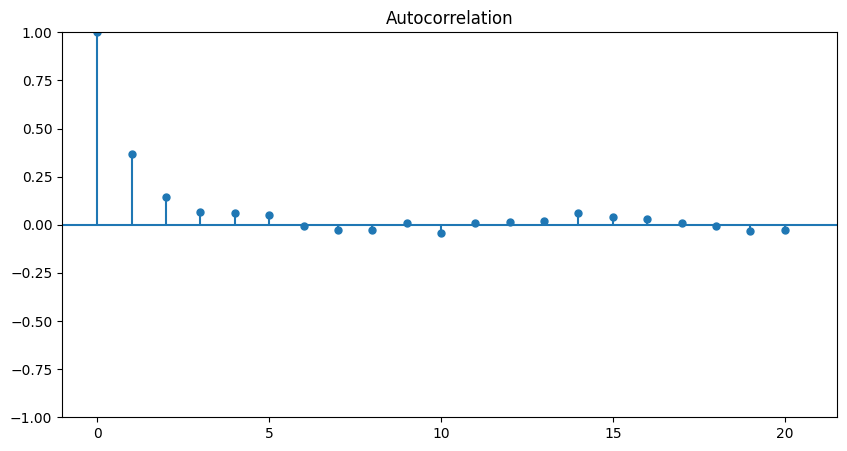

In [10]:
from statsmodels.graphics.tsaplots import plot_acf

# AR parameter = +0.3
ar3 = np.array([1, -0.3])
ma3 = np.array([1])
AR_object3 = ArmaProcess(ar3, ma3)
simulated_data_3 = AR_object3.generate_sample(nsample=1000)

# Plot 1: AR parameter = +0.9
plot_acf(simulated_data_AR1, alpha=1, lags=20);

# Plot 2: AR parameter = -0.9
plot_acf(simulated_data_AR2, alpha=1, lags=20);

# Plot 3: AR parameter = +0.3
plot_acf(simulated_data_3, alpha=1, lags=20);

In [11]:
np.random.seed(12345)
arparams = np.array([.75, -.25])
maparams = np.array([.65, .35])
ar = np.r_[1, -arparams] # add zero-lag and negate
ma = np.r_[1, maparams] # add zero-lag
arma_process = sm.tsa.ArmaProcess(ar, ma)


In [12]:
arma_process.isstationary

True

In [13]:
arma_process.isinvertible

True